In [ ]:
#experiment 3
import pandas as pd

# Create sample dataset (acts like loading CSV)
data = {
    "Sky": ["Sunny","Sunny","Rainy","Sunny"],
    "AirTemp": ["Warm","Warm","Cold","Warm"],
    "Humidity": ["Normal","High","High","High"],
    "Wind": ["Strong","Strong","Strong","Strong"],
    "Water": ["Warm","Warm","Warm","Cool"],
    "Forecast": ["Same","Same","Change","Change"],
    "EnjoySport": ["Yes","Yes","No","Yes"]
}

df = pd.DataFrame(data)
print("Training Data:\n", df)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# Initialize hypothesis
h = ["0"] * len(X.columns)
steps = []
# FIND-S Algorithm
for i in range(len(X)):
    if y[i] == "Yes":
        for j in range(len(h)):
            if h[j] == "0":
                h[j] = X.iloc[i, j]
            elif h[j] != X.iloc[i, j]:
                h[j] = "?"
        steps.append(h.copy())
# Show step-by-step updates
print("\nHypothesis Updates:")
for i, s in enumerate(steps, 1):
    print("Step", i, ":", s)
# Evolution table
print("\nEvolution Table:")
print(pd.DataFrame(steps, columns=X.columns))


print("\nFinal Hypothesis:", h)


Training Data:
      Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Warm   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes

Hypothesis Updates:
Step 1 : ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Step 2 : ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Step 3 : ['Sunny', 'Warm', '?', 'Strong', '?', '?']

Evolution Table:
     Sky AirTemp Humidity    Wind Water Forecast
0  Sunny    Warm   Normal  Strong  Warm     Same
1  Sunny    Warm        ?  Strong  Warm     Same
2  Sunny    Warm        ?  Strong     ?        ?

Final Hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [ ]:
#experiment 4
import pandas as pd

# New dataset (Student performance example)
data = {
    "Study": ["High","High","Low","High"],
    "Attendance": ["Good","Good","Poor","Good"],
    "Assignment": ["Yes","Yes","No","Yes"],
    "Project": ["Complete","Complete","Incomplete","Complete"],
    "Result": ["Pass","Pass","Fail","Pass"]
}

df = pd.DataFrame(data)
print("Training Data:\n", df, "\n")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Initialize S and G
S = ['0'] * len(X[0])
G = [['?'] * len(X[0])]

# Candidate-Elimination Algorithm
for i in range(len(X)):
    if y[i] == "Pass":   # Positive example
        for j in range(len(S)):
            if S[j] == '0':
                S[j] = X[i][j]
            elif S[j] != X[i][j]:
                S[j] = '?'
        G = [g for g in G if all(g[k] == '?' or g[k] == S[k] for k in range(len(S)))]

    else:   # Negative example
        new_G = []
        for g in G:
            for j in range(len(S)):
                if S[j] != '?' and S[j] != X[i][j]:
                    h = g.copy()
                    h[j] = S[j]
                    new_G.append(h)
        G = new_G

    print(f"Step {i+1}:")
    print("S =", S)
    print("G =", G, "\n")

print("Final Version Space:")
print("S (Specific) =", S)
print("G (General) =", G)


Training Data:
   Study Attendance Assignment     Project Result
0  High       Good        Yes    Complete   Pass
1  High       Good        Yes    Complete   Pass
2   Low       Poor         No  Incomplete   Fail
3  High       Good        Yes    Complete   Pass 

Step 1:
S = ['High', 'Good', 'Yes', 'Complete']
G = [['?', '?', '?', '?']] 

Step 2:
S = ['High', 'Good', 'Yes', 'Complete']
G = [['?', '?', '?', '?']] 

Step 3:
S = ['High', 'Good', 'Yes', 'Complete']
G = [['High', '?', '?', '?'], ['?', 'Good', '?', '?'], ['?', '?', 'Yes', '?'], ['?', '?', '?', 'Complete']] 

Step 4:
S = ['High', 'Good', 'Yes', 'Complete']
G = [['High', '?', '?', '?'], ['?', 'Good', '?', '?'], ['?', '?', 'Yes', '?'], ['?', '?', '?', 'Complete']] 

Final Version Space:
S (Specific) = ['High', 'Good', 'Yes', 'Complete']
G (General) = [['High', '?', '?', '?'], ['?', 'Good', '?', '?'], ['?', '?', 'Yes', '?'], ['?', '?', '?', 'Complete']]


In [ ]:
#experiment 1
import numpy as np
# a
marks = np.array([78,85,90,67,88,76,95,82,70,89])
print("a)", marks, marks.shape, marks.dtype)
# b
arr = np.arange(10,101,10)
print("b)", arr[0], arr[-1], arr[2:7])

# c
x = np.array([1,2,3,4,5])
y = np.array([6,7,8,9,10])
print("c) Add:", x+y, "Mul:", x*y)
# d
nums = np.array([23,55,67,45,89,12,60,30])
print("d)", nums[nums>50])
# e
print("e)\n", np.arange(1,13).reshape(3,4))


a) [78 85 90 67 88 76 95 82 70 89] (10,) int64
b) 10 100 [30 40 50 60 70]
c) Add: [ 7  9 11 13 15] Mul: [ 6 14 24 36 50]
d) [55 67 89 60]
e)
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [ ]:
#experiment 2
import pandas as pd
# a) Create DataFrame
df = pd.DataFrame({
    "Student": ["Asha", "Bala", "Chitra", "Dinesh", "Esha"],
    "Marks": [78, 45, 88, 62, 35],
    "Attendance": [90, 75, 95, 85, 60]
})
print("a) DataFrame:")
print(df)
print("Column names:", df.columns)
print("\n----------------")
# b) First 3 rows, last 2 rows, shape
print("b) First 3 rows:")
print(df.head(3))
print("Last 2 rows:")
print(df.tail(2))
print("Shape:", df.shape)
print("\n----------------")
# c) Students scoring more than 70
print("c) Marks > 70:")
print(df[df["Marks"] > 70])
print("\n----------------")
# d) Result column
df["Result"] = df["Marks"].apply(lambda x: "Pass" if x >= 50 else "Fail")
print("d) With Result column:")
print(df)
print("\n----------------")
# e) Save to CSV and read back
df.to_csv("students.csv", index=False)
new_df = pd.read_csv("students.csv")
print("e) Data read from CSV:")
print(new_df)


a) DataFrame:
  Student  Marks  Attendance
0    Asha     78          90
1    Bala     45          75
2  Chitra     88          95
3  Dinesh     62          85
4    Esha     35          60
Column names: Index(['Student', 'Marks', 'Attendance'], dtype='object')

----------------
b) First 3 rows:
  Student  Marks  Attendance
0    Asha     78          90
1    Bala     45          75
2  Chitra     88          95
Last 2 rows:
  Student  Marks  Attendance
3  Dinesh     62          85
4    Esha     35          60
Shape: (5, 3)

----------------
c) Marks > 70:
  Student  Marks  Attendance
0    Asha     78          90
2  Chitra     88          95

----------------
d) With Result column:
  Student  Marks  Attendance Result
0    Asha     78          90   Pass
1    Bala     45          75   Fail
2  Chitra     88          95   Pass
3  Dinesh     62          85   Pass
4    Esha     35          60   Fail

----------------
e) Data read from CSV:
  Student  Marks  Attendance Result
0    Asha     78     

Entropy: 0.9709505944546686


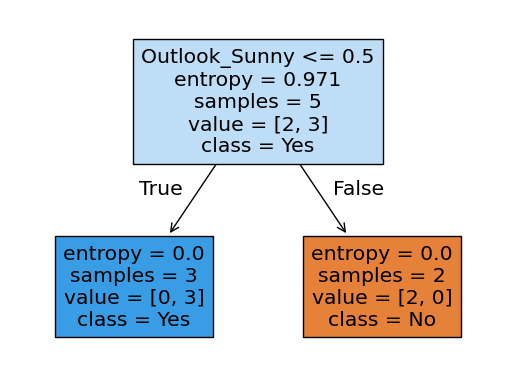

Prediction: No


In [ ]:
#experiment 5
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from math import log2

# Dataset
data = {"Outlook":["Sunny","Sunny","Overcast","Rain","Rain"],
        "Temp":["Hot","Hot","Hot","Mild","Cool"],
        "Play":["No","No","Yes","Yes","Yes"]}

df = pd.DataFrame(data)

# Entropy
def entropy(col):
    vals, counts = np.unique(col, return_counts=True)
    p = counts / counts.sum()
    return -sum(i*log2(i) for i in p)

print("Entropy:", entropy(df["Play"]))

# Encode data
X = pd.get_dummies(df[["Outlook","Temp"]])
y = (df["Play"] == "Yes").astype(int)

# Train ID3 (entropy)
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)

# Visualize tree
plot_tree(model, feature_names=X.columns,
          class_names=["No","Yes"], filled=True)
plt.show()

# Test sample: Sunny, Hot
test = pd.get_dummies(pd.DataFrame([["Sunny","Hot"]],
                     columns=["Outlook","Temp"]))
test = test.reindex(columns=X.columns, fill_value=0)

pred = model.predict(test)
print("Prediction:", "Yes" if pred[0] else "No")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.2000 - loss: 1.1062
Test Accuracy: 0.20000000298023224


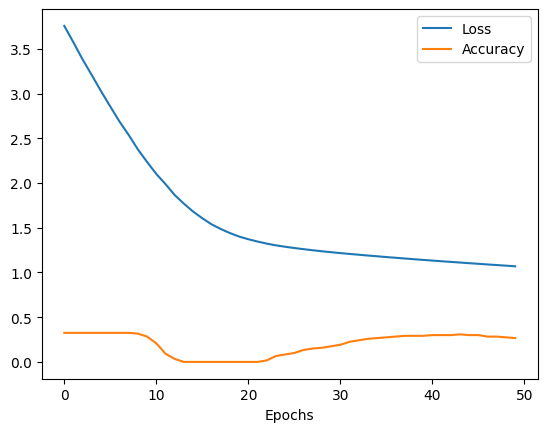

In [ ]:
#experiment 6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
X, y = load_iris(return_X_y=True)
y = to_categorical(y)

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

# Build ANN (uses backpropagation)
model = Sequential([
    Dense(8, input_dim=4, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    epochs=50, verbose=0)

# Test on unseen data
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

# Plot loss & accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel("Epochs")
plt.legend()
plt.show()


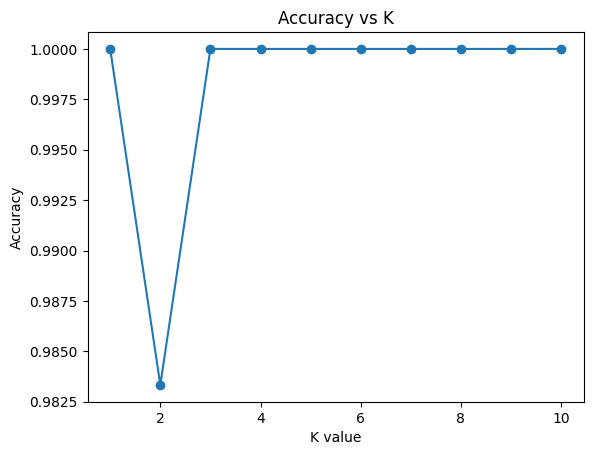

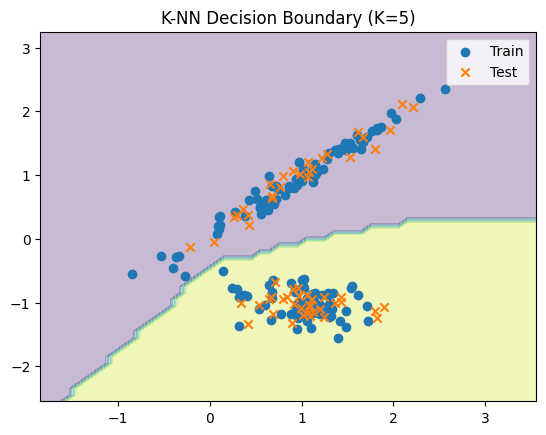

In [ ]:
#experiment 7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create 2D dataset
X, y = make_classification(n_samples=200, n_features=2,
                           n_redundant=0, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

# Evaluate different K values
k_values = range(1, 11)
acc = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, pred))

# Plot Accuracy vs K
plt.plot(k_values, acc, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

# Train best model (example: k=5)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Decision boundary visualization
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], label="Train")
plt.scatter(X_test[:,0], X_test[:,1], marker='x', label="Test")
plt.legend()
plt.title("K-NN Decision Boundary (K=5)")
plt.show()


Confusion Matrix:
 [[13  0  0]
 [ 0 14  3]
 [ 0  0 15]]
Accuracy: 0.9333333333333333
Precision: 0.9444444444444444
Recall: 0.9333333333333333
F1-score: 0.9331378299120233


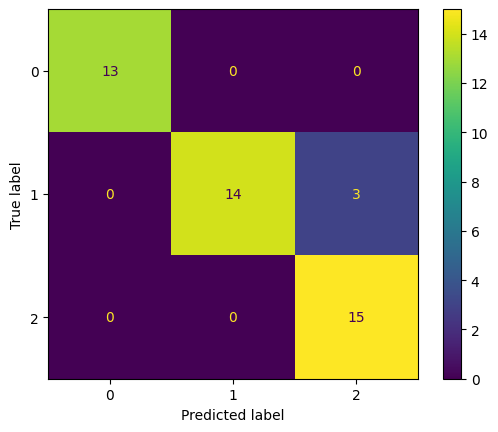

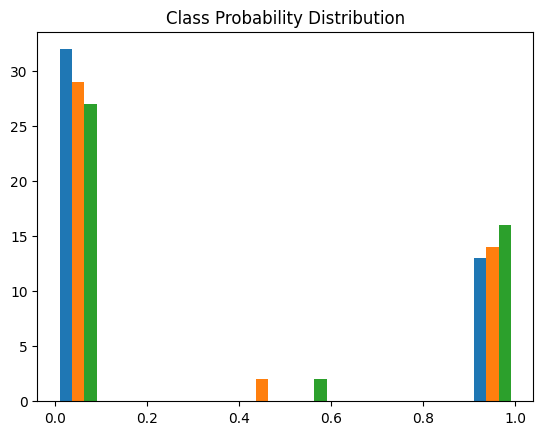

In [ ]:
#experiment 8
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Plot class probability distribution
probs = model.predict_proba(X_test)
plt.hist(probs)
plt.title("Class Probability Distribution")
plt.show()


Accuracy: 0.8333333333333334
Confusion Matrix:
 [[21  6]
 [ 4 29]]


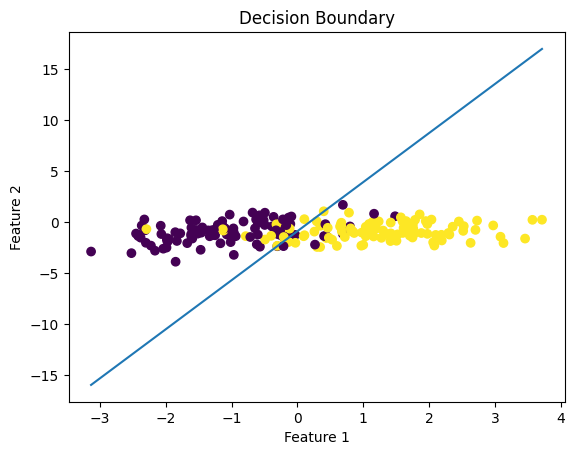

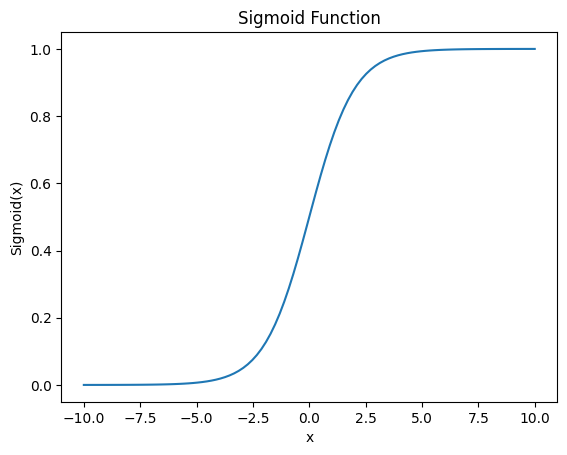

In [ ]:
#experiment 9
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Create binary dataset
X, y = make_classification(n_samples=200, n_features=2,
                           n_redundant=0, n_clusters_per_class=1)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 3. Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Test model
y_pred = model.predict(X_test)

# 5. Accuracy & confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Plot decision boundary
plt.scatter(X[:,0], X[:,1], c=y)

x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_vals = -(model.coef_[0][0]*x_vals + model.intercept_) / model.coef_[0][1]
plt.plot(x_vals, y_vals)

plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 7. Plot sigmoid function
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.show()


MSE: 4098.477691465325
RMSE: 64.01935403817602


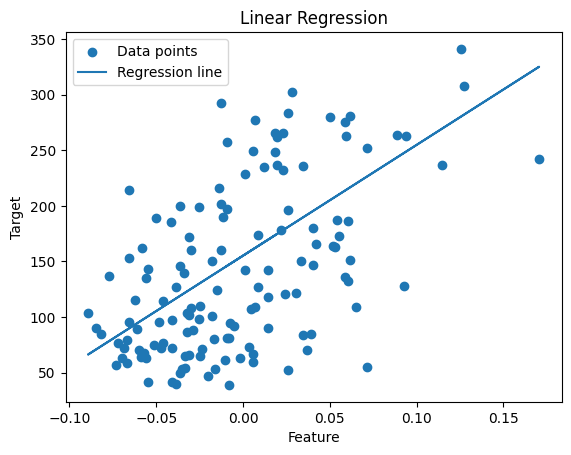

In [ ]:
#experiment 10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Load real-world dataset (use 1 feature for easy plotting)
data = load_diabetes()
X = data.data[:, np.newaxis, 2]   # single feature
y = data.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 3. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

# 6. Plot regression line
plt.scatter(X_test, y_test, label="Data points")
plt.plot(X_test, y_pred, label="Regression line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.legend()
plt.show()


Linear -> MSE: 12.58556215772535 R2: 0.6216482125090642
Poly   -> MSE: 1.071117367383927 R2: 0.9677996766863898


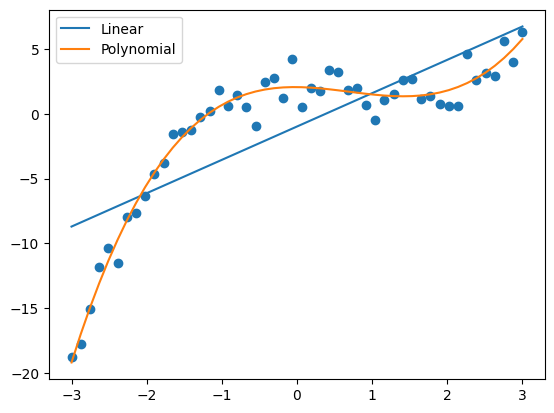

In [ ]:
#experiment 11
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Dataset
np.random.seed(0)
X = np.linspace(-3, 3, 50).reshape(-1,1)
y = 0.5*X**3 - X**2 + 2 + np.random.randn(50,1)

# Models
lin = LinearRegression().fit(X, y)
poly = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X, y)

# Predictions
yl, yp = lin.predict(X), poly.predict(X)

# Metrics
print("Linear -> MSE:", mean_squared_error(y, yl), "R2:", r2_score(y, yl))
print("Poly   -> MSE:", mean_squared_error(y, yp), "R2:", r2_score(y, yp))

# Plot
plt.scatter(X, y)
plt.plot(X, yl, label="Linear")
plt.plot(X, yp, label="Polynomial")
plt.legend()
plt.show()


Final Means:
 [[1.99931484 2.10095539]
 [5.87200934 5.89895326]]
Final Weights: [0.49999671 0.50000329]


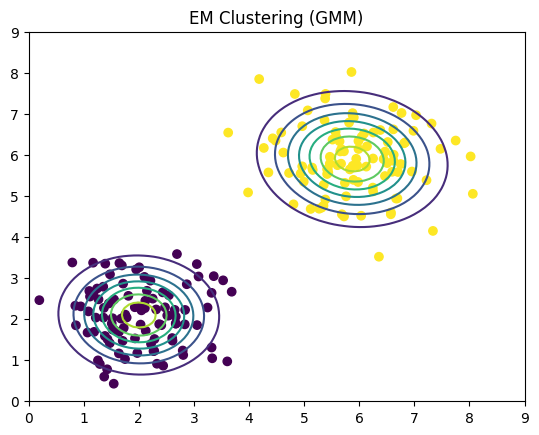

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Data
np.random.seed(0)
X = np.vstack([
    np.random.multivariate_normal([2,2], [[0.5,0],[0,0.5]], 100),
    np.random.multivariate_normal([6,6], [[0.8,0],[0,0.8]], 100)
])

# Initialize
k, n = 2, len(X)
means = X[np.random.choice(n, k, False)]
covs = [np.eye(2) for _  in range(k)]
weights = np.ones(k)/k

# EM iterations
for _ in range(6):

    # E-step
    r = np.array([weights[i]*multivariate_normal.pdf(X, means[i], covs[i])
                  for i in range(k)]).T
    r /= r.sum(axis=1, keepdims=True)

    # M-step
    Nk = r.sum(axis=0)
    for i in range(k):
        means[i] = (r[:,i][:,None]*X).sum(0)/Nk[i]
        diff = X - means[i]
        covs[i] = (r[:,i][:,None]*diff).T @ diff / Nk[i]
        weights[i] = Nk[i]/n

print("Final Means:\n", means)
print("Final Weights:", weights)

# Plot
labels = r.argmax(1)
plt.scatter(X[:,0], X[:,1], c=labels)

x,y = np.meshgrid(np.linspace(0,9,100), np.linspace(0,9,100))
grid = np.dstack((x,y))
for i in range(k):
    plt.contour(x, y, multivariate_normal(means[i], covs[i]).pdf(grid))

plt.title("EM Clustering (GMM)")
plt.show()


Accuracy: 0.956140350877193


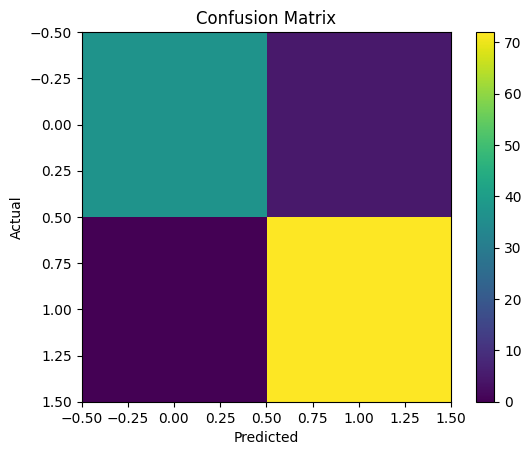

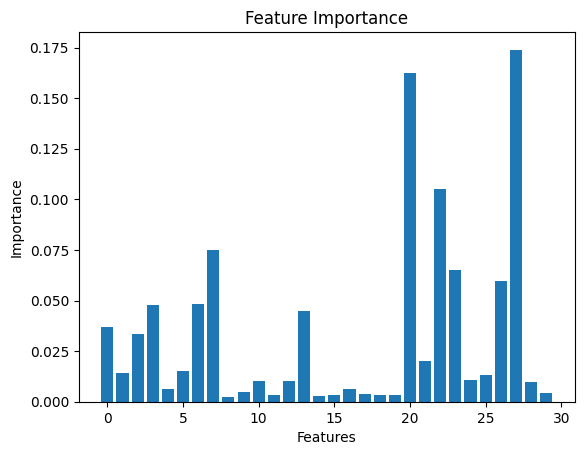

In [ ]:
# Credit Score Classification using built-in dataset

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load built-in dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

# 3. Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 4. Prediction
y_pred = model.predict(X_test)

# 5. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# 7. Feature Importance
plt.bar(range(X.shape[1]), model.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


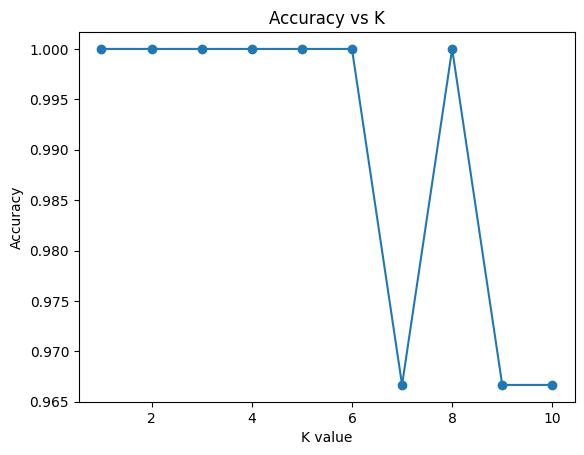

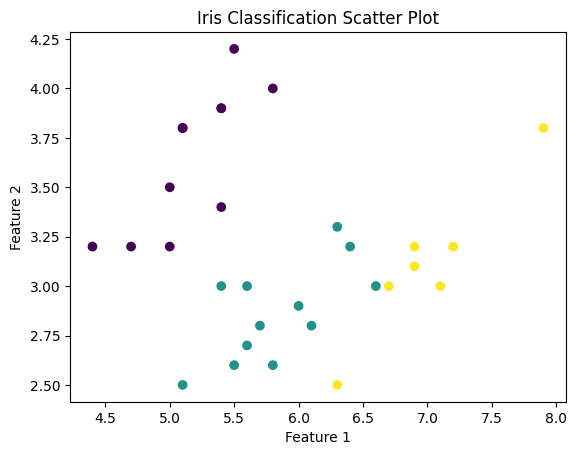

Best Accuracy: 1.0


In [ ]:
#experiment 14
# Iris Classification using KNN
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# 1. Load dataset
data = load_iris()
X = data.data
y = data.target
# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
# 3. Experiment with K values
k_values = range(1, 11)
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
# 4. Plot Accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

# 5. Scatter plot visualization (first two features)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Iris Classification Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 6. Print best accuracy
print("Best Accuracy:", max(accuracies))


Actual: [30000 25000]
Predicted: [30000. 25000.]
MSE: 0.0
RMSE: 0.0


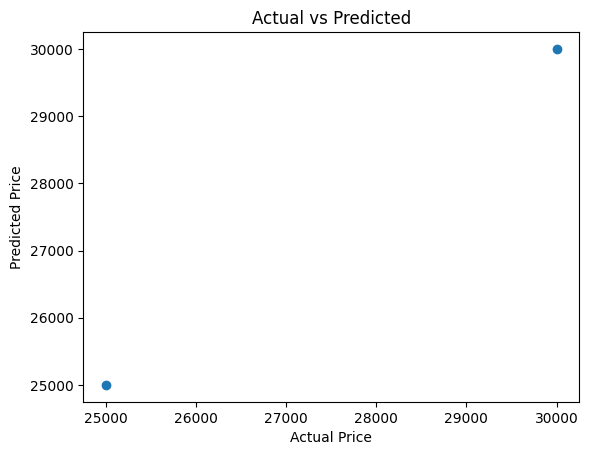

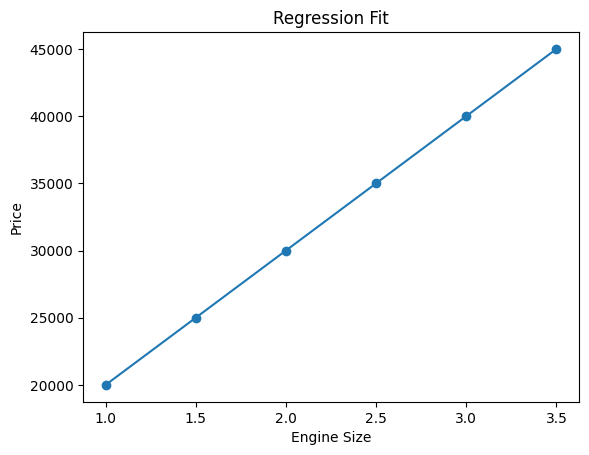

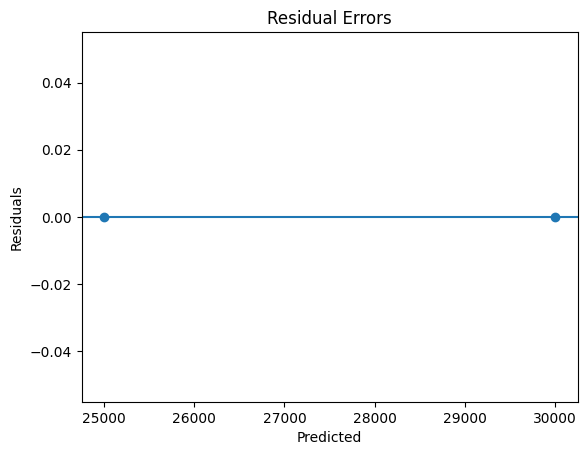

In [ ]:
#experiment 152  m
# Small Car Price Prediction
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Small dataset (Engine size vs Price)
X = np.array([[1.0], [1.5], [2.0], [2.5], [3.0], [3.5]])
y = np.array([20000, 25000, 30000, 35000, 40000, 45000])

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

# 3. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prediction
y_pred = model.predict(X_test)

# 5. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Actual:", y_test)
print("Predicted:", y_pred)
print("MSE:", mse)
print("RMSE:", rmse)

# 6. Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

# 7. Regression fit
plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Regression Fit")
plt.show()

# 8. Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Errors")
plt.show()



Daily Water Usage Data:
   Mon  Tue  Wed  Thu  Fri  Sat  Sun Household_ID
0  182  172   94  186  151  100  182           H1
1  201  154  167  196  179  183  231           H2
2  210  229  132   81  167  237  117           H3
3  209  100  240  137  101  168  128           H4
4  138  249   94  130  187  134  143           H5
5  210  130  214  100  152  246   97           H6
6  211  168  139   93   88  169  132           H7
7  209  163  171  190   87  114  160           H8
8  243  129  183  211   81  213  133           H9
9  185   83  133  225  123  241   93          H10

Households exceeding standard limit:
   Mon  Tue  Wed  Thu  Fri  Sat  Sun Household_ID
1  201  154  167  196  179  183  231           H2
2  210  229  132   81  167  237  117           H3
3  209  100  240  137  101  168  128           H4
4  138  249   94  130  187  134  143           H5
5  210  130  214  100  152  246   97           H6
6  211  168  139   93   88  169  132           H7
7  209  163  171  190   87  114  160 

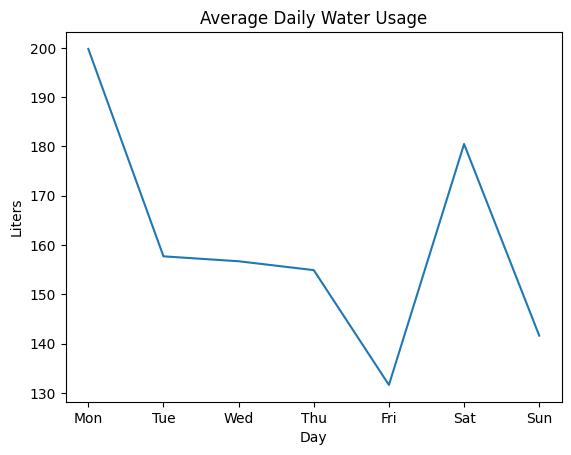

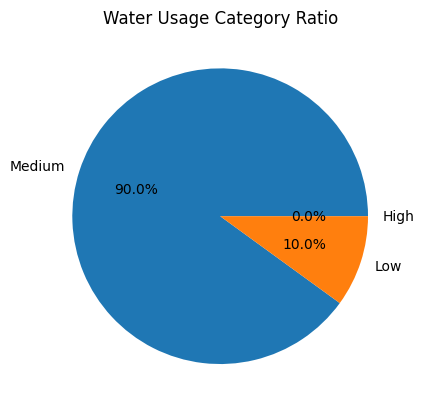

In [ ]:
##assiment 5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Generate random water usage data
# -----------------------------
np.random.seed(42)

households = 10
days = 7  # 1 week

# Random daily water usage (liters)
water_usage = np.random.randint(80, 250, size=(households, days))

# Create DataFrame
df = pd.DataFrame(
    water_usage,
    columns=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
)

df["Household_ID"] = ["H" + str(i+1) for i in range(households)]

print("\nDaily Water Usage Data:")
print(df)

# -----------------------------
# Step 2: Filter households
# -----------------------------
standard_limit = 200

# Households exceeding limit
high_usage = df[df.iloc[:, 0:7].max(axis=1) > standard_limit]

# Weekend usage (Sat + Sun)
df["Weekend_Usage"] = df["Sat"] + df["Sun"]

print("\nHouseholds exceeding standard limit:")
print(high_usage)

# -----------------------------
# Step 3: Demographic information
# -----------------------------
demo_data = pd.DataFrame({
    "Household_ID": df["Household_ID"],
    "Locality": np.random.choice(["Urban", "Suburban", "Rural"], households),
    "Family_Size": np.random.randint(2, 6, households)
})

# Merge data
combined_df = pd.merge(df, demo_data, on="Household_ID")

print("\nCombined Data:")
print(combined_df)

# -----------------------------
# Step 4: Group-by analysis
# -----------------------------
group_analysis = combined_df.groupby(
    ["Locality", "Family_Size"]
)[["Weekend_Usage"]].mean()

print("\nGroup-by Analysis:")
print(group_analysis)

# -----------------------------
# Step 5: Sort households by total usage
# -----------------------------
combined_df["Total_Usage"] = combined_df.iloc[:, 0:7].sum(axis=1)

sorted_df = combined_df.sort_values(by="Total_Usage", ascending=False)

print("\nSorted by Total Usage:")
print(sorted_df[["Household_ID", "Total_Usage"]])

# -----------------------------
# Step 6: Visualization
# -----------------------------

# Line plot: average daily usage
avg_daily = df.iloc[:, 0:7].mean()

plt.figure()
plt.plot(avg_daily)
plt.title("Average Daily Water Usage")
plt.xlabel("Day")
plt.ylabel("Liters")
plt.show()

# Pie chart: usage categories
categories = pd.cut(
    combined_df["Total_Usage"],
    bins=[0, 1000, 1400, 2000],
    labels=["Low", "Medium", "High"]
)

category_counts = categories.value_counts()

plt.figure()
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%")
plt.title("Water Usage Category Ratio")
plt.show()


RMSE: 13400.0


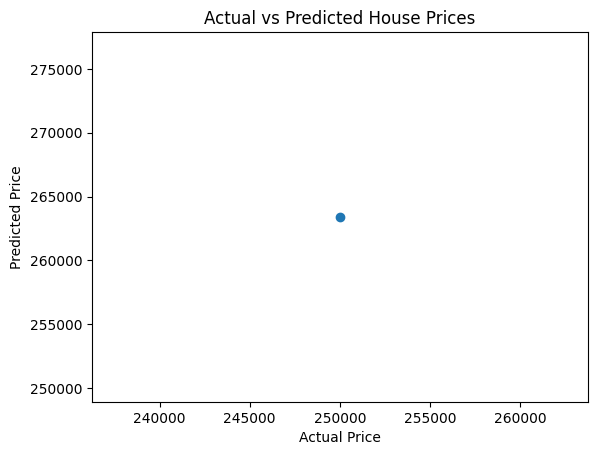

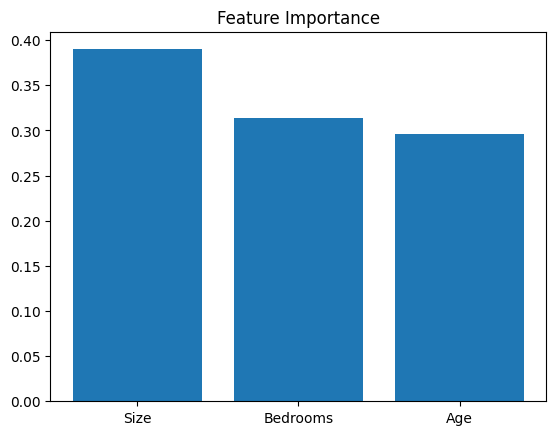

In [ ]:
#experiment 16
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Small sample dataset
data = {
    "Size": [800, 1000, 1200, 1500, 1800],
    "Bedrooms": [2, 3, 3, 4, 4],
    "Age": [10, 5, 8, 2, 1],
    "Price": [200000, 250000, 270000, 350000, 400000]
}

df = pd.DataFrame(data)

# Features and target
X = df[["Size", "Bedrooms", "Age"]]
y = df["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model training
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Plot: Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Feature importance plot
importance = model.feature_importances_
plt.bar(X.columns, importance)
plt.title("Feature Importance")
plt.show()


Accuracy: 0.8222222222222222
Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]


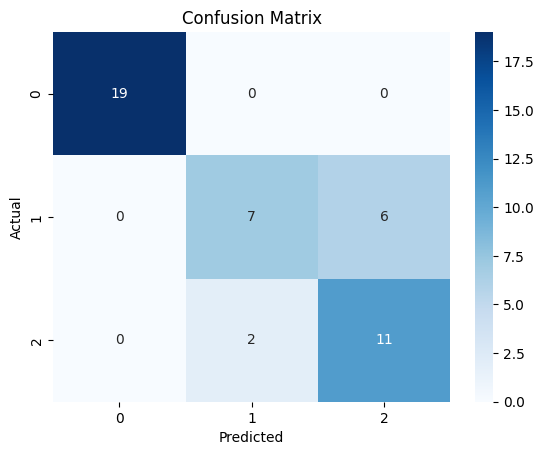

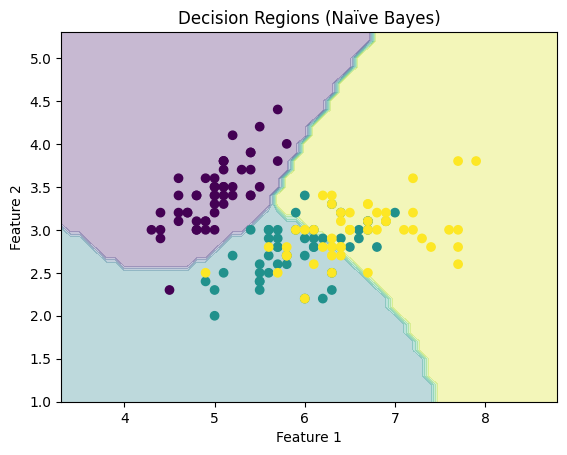

In [ ]:
#experiment 17
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # select 2 features for visualization
y = iris.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# Train Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Decision region visualization
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Regions (Naïve Bayes)")
plt.show()



LogReg Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

KNN Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

DecisionTree Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

NaiveBayes Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

SVM Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


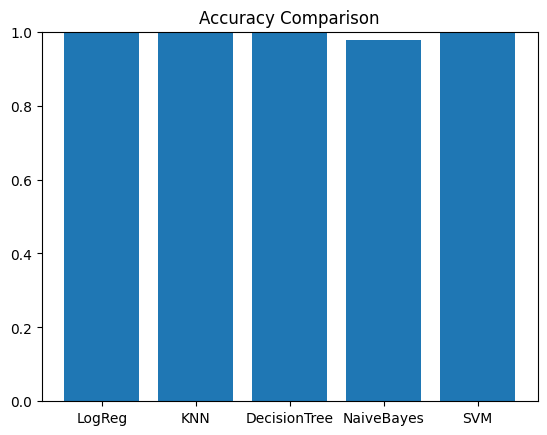

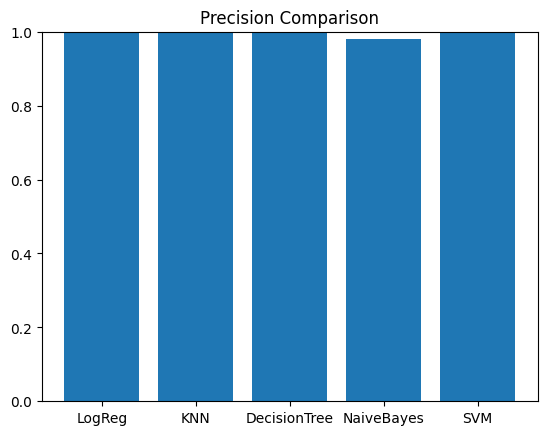

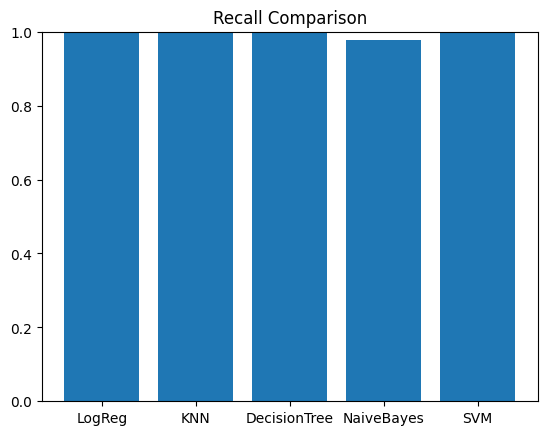

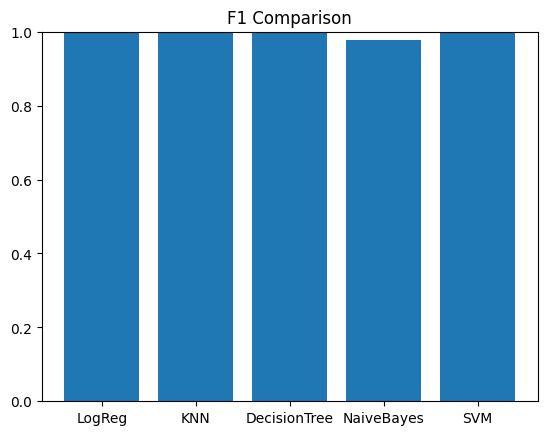

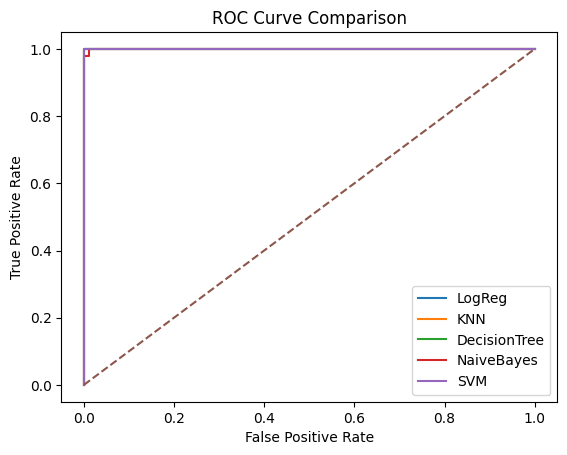

In [ ]:
#EXPERIMENT 18
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset
X, y = load_iris(return_X_y=True)
y_bin = label_binarize(y, classes=[0,1,2])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Classifiers
models = {
    "LogReg": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(probability=True)
}

metrics = {"Accuracy":[], "Precision":[], "Recall":[], "F1":[]}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted"))
    metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted"))
    metrics["F1"].append(f1_score(y_test, y_pred, average="weighted"))

    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Bar chart comparison
labels = list(models.keys())
x = np.arange(len(labels))

for i, (metric, values) in enumerate(metrics.items()):
    plt.figure()
    plt.bar(labels, values)
    plt.title(metric + " Comparison")
    plt.ylim(0,1)
    plt.show()

# ROC curves (one-vs-rest)
plt.figure()
for name, model in models.items():
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(
        label_binarize(y_test, classes=[0,1,2]).ravel(),
        y_score.ravel()
    )
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


MSE: 23897590.277777817
R2 Score: 0.6266001519097216


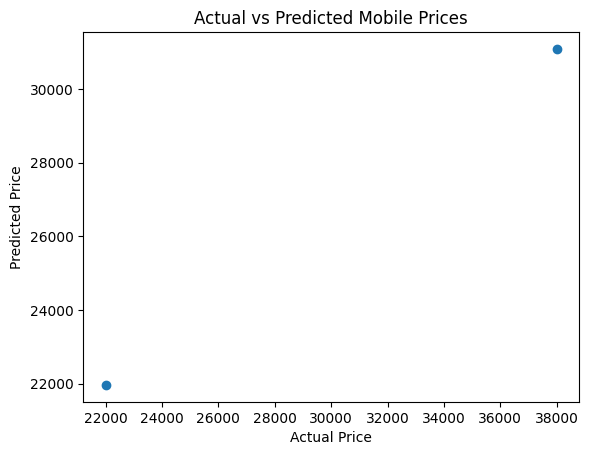

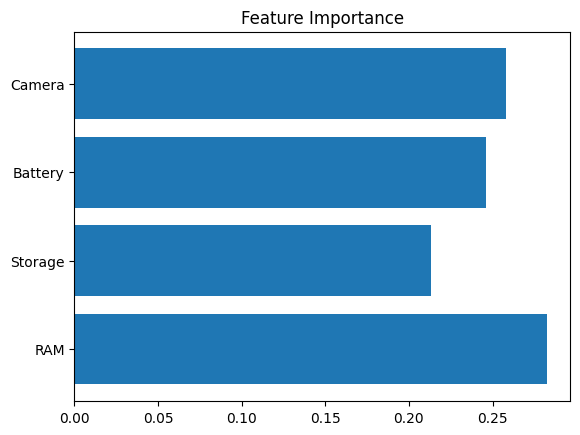

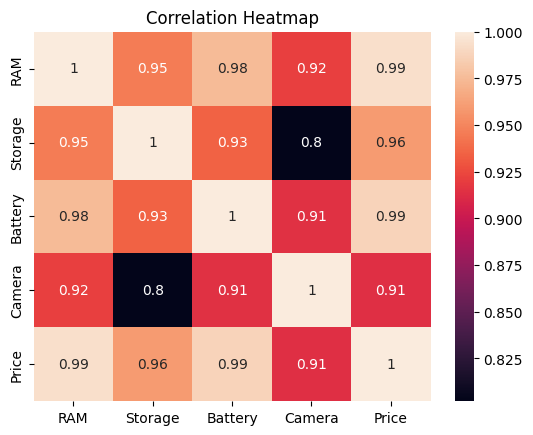

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create mobile dataset
data = pd.DataFrame({
    "RAM": [4, 6, 8, 4, 12, 8, 6, 3, 10, 5],
    "Storage": [64, 128, 128, 32, 256, 128, 64, 32, 256, 64],
    "Battery": [4000, 4500, 5000, 3500, 6000, 5000, 4200, 3000, 5500, 3800],
    "Camera": [12, 48, 64, 8, 108, 64, 48, 5, 50, 12],
    "Price": [15000, 22000, 28000, 10000, 45000, 30000, 20000, 8000, 38000, 16000]
})

# Features and target
X = data.drop("Price", axis=1)
y = data["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Actual vs Predicted plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Mobile Prices")
plt.show()

# Feature importance
importance = model.feature_importances_
plt.barh(X.columns, importance)
plt.title("Feature Importance")
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic

Accuracy: 0.6333333333333333


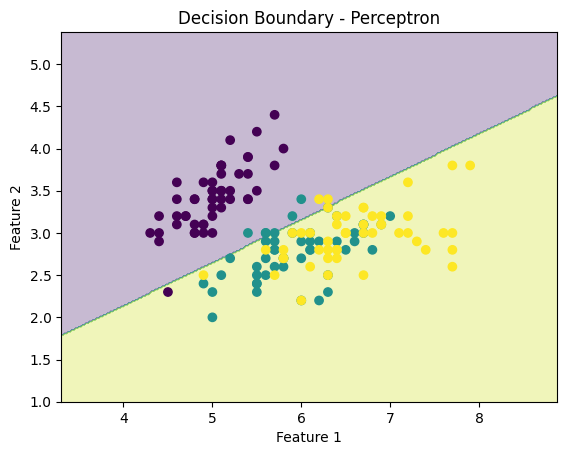

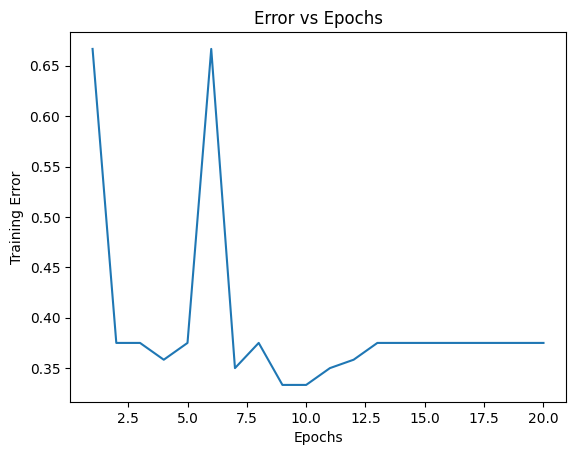

In [ ]:
#experiment 20
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]   # select 2 features
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Perceptron model
model = Perceptron(max_iter=20, eta0=0.1, random_state=42)
errors = []

for i in range(1, 21):
    temp_model = Perceptron(max_iter=i, eta0=0.1, random_state=42)
    temp_model.fit(X_train, y_train)
    pred = temp_model.predict(X_train)
    errors.append(np.mean(pred != y_train))

model.fit(X_train, y_train)

# Test prediction
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Decision boundary plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary - Perceptron")
plt.show()

# Training error vs epochs
plt.plot(range(1, 21), errors)
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.title("Error vs Epochs")
plt.show()


Accuracy: 1.0


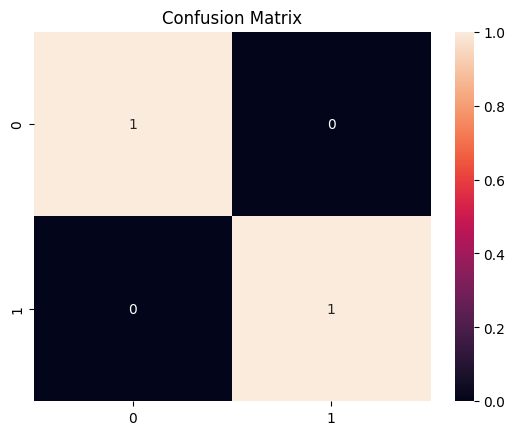

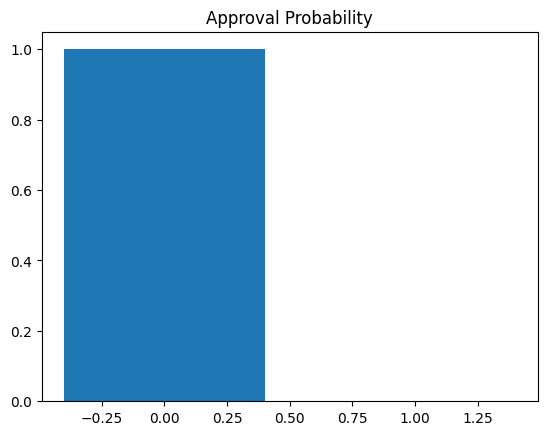

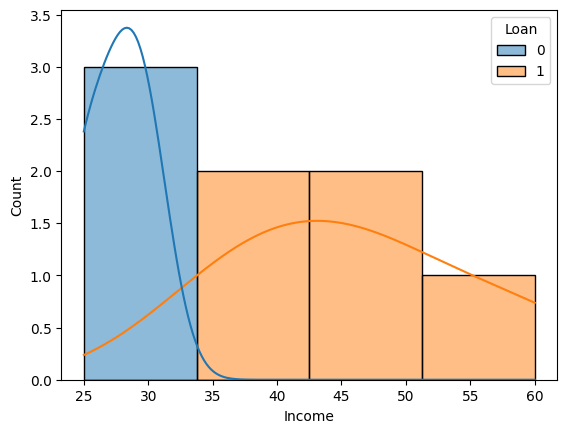

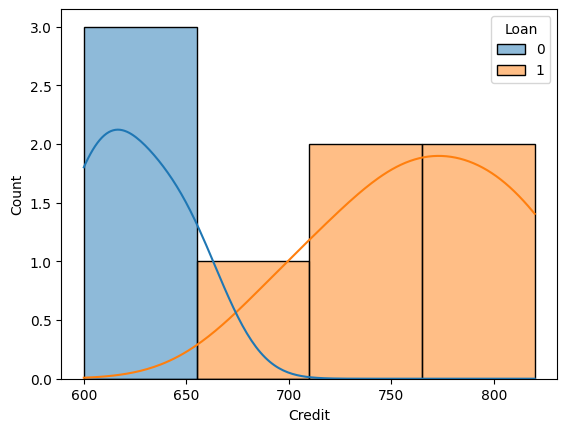

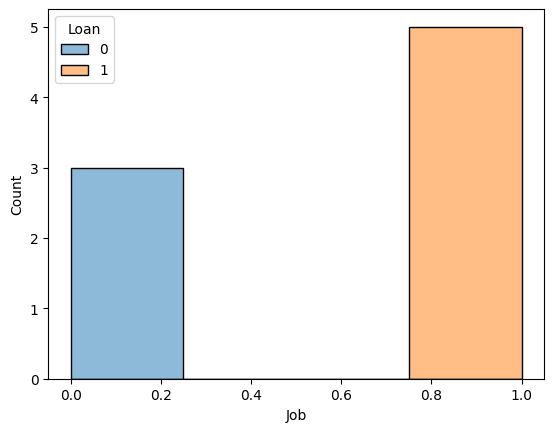

In [ ]:
#experiment 21
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Small dataset
data = pd.DataFrame({
    "Income":[25,40,35,50,28,60,45,30],
    "Credit":[600,750,700,800,620,820,760,650],
    "Job":["No","Yes","Yes","Yes","No","Yes","Yes","No"],
    "Loan":["No","Yes","Yes","Yes","No","Yes","Yes","No"]
})

# Encoding
le = LabelEncoder()
data["Job"] = le.fit_transform(data["Job"])
data["Loan"] = le.fit_transform(data["Loan"])

# Split data
X = data.drop("Loan", axis=1)
y = data["Loan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Train model (:contentReference[oaicite:0]{index=0})
model = GaussianNB().fit(X_train, y_train)

# Predict & accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

# Probability distribution
plt.bar(range(len(X_test)), model.predict_proba(X_test)[:,1])
plt.title("Approval Probability")
plt.show()

# Feature likelihood
for col in X.columns:
    sns.histplot(data, x=col, hue="Loan", kde=True)
    plt.show()


MAE: 7.5789473684210495
RMSE: 8.747717210277054


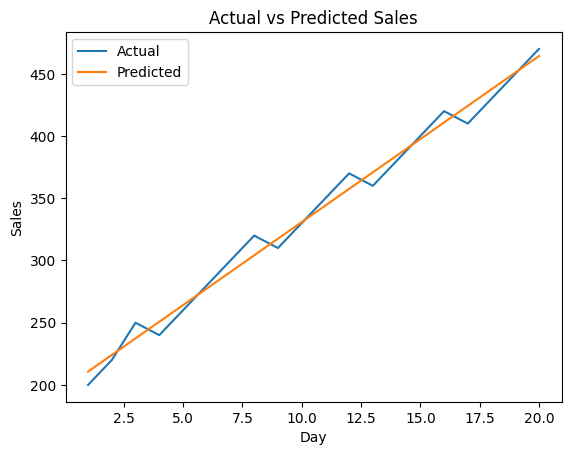

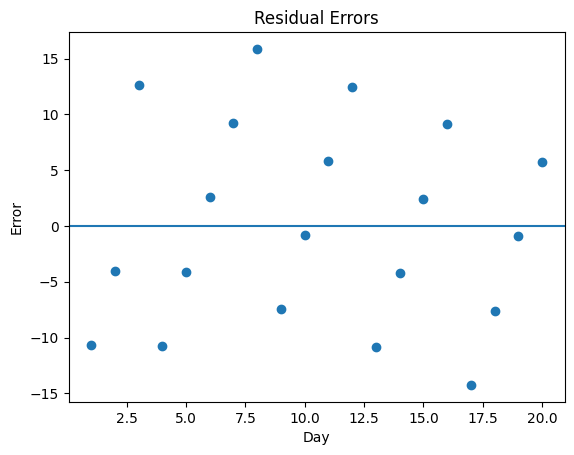

In [ ]:
#experiment 22
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create historical sales data
days = np.arange(1, 21)
sales = np.array([200,220,250,240,260,280,300,320,310,330,
                  350,370,360,380,400,420,410,430,450,470])

data = pd.DataFrame({"Day": days, "Sales": sales})

# Train model
X = data[["Day"]]
y = data["Sales"]
model = LinearRegression().fit(X, y)

# Predict sales
y_pred = model.predict(X)

# Evaluation
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

# Actual vs predicted plot
plt.plot(days, y, label="Actual")
plt.plot(days, y_pred, label="Predicted")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

# Residual error plot
residuals = y - y_pred
plt.scatter(days, residuals)
plt.axhline(0)
plt.title("Residual Errors")
plt.xlabel("Day")
plt.ylabel("Error")
plt.show()


Before Normalization:
    Age  Income  Score
0   18   15000     40
1   22   20000     50
2   25   25000     55
3   30   30000     60
4   35   35000     65
5   40   40000     70
6   45   45000     75
7   50   50000     80

After Normalization:
        Age    Income  Score
0  0.00000  0.000000  0.000
1  0.12500  0.142857  0.250
2  0.21875  0.285714  0.375
3  0.37500  0.428571  0.500
4  0.53125  0.571429  0.625
5  0.68750  0.714286  0.750
6  0.84375  0.857143  0.875
7  1.00000  1.000000  1.000


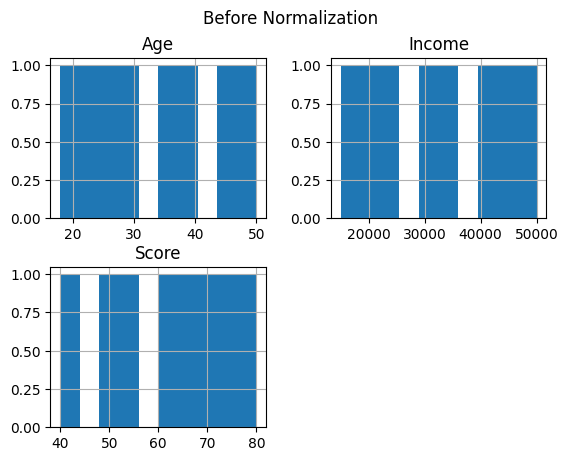

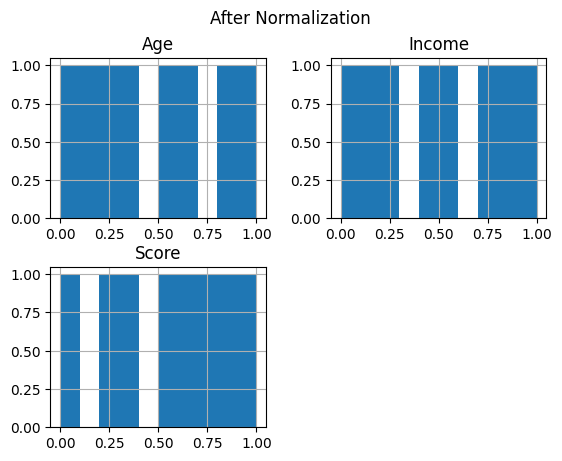

In [ ]:
#experiment 23
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Create dataset
data = pd.DataFrame({
    "Age":[18,22,25,30,35,40,45,50],
    "Income":[15000,20000,25000,30000,35000,40000,45000,50000],
    "Score":[40,50,55,60,65,70,75,80]
})

print("Before Normalization:\n", data)

# Min–Max scaling (:contentReference[oaicite:0]{index=0})
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled, columns=data.columns)

print("\nAfter Normalization:\n", scaled_data)

# Histograms before scaling
data.hist()
plt.suptitle("Before Normalization")
plt.show()

# Histograms after scaling
scaled_data.hist()
plt.suptitle("After Normalization")
plt.show()


Accuracy: 0.7191011235955056


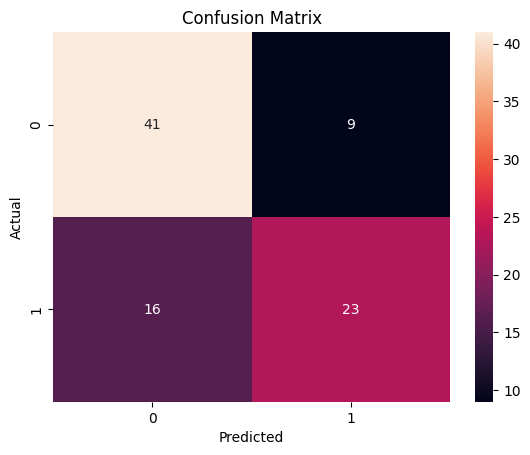

In [1]:
#EXPERIMENT 24
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset (convert to binary classification)
data = load_diabetes()
X = pd.DataFrame(data.data)
y = (data.target > data.target.mean()).astype(int)

# Preprocessing
X.fillna(X.mean(), inplace=True)
X = StandardScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction & accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Important plot: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


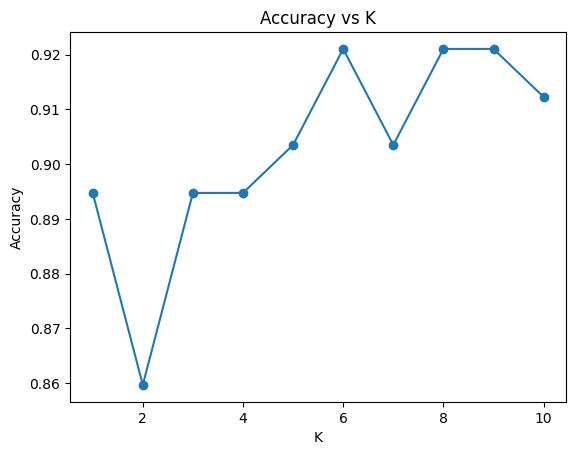

Confusion Matrix:
 [[39  4]
 [ 5 66]]


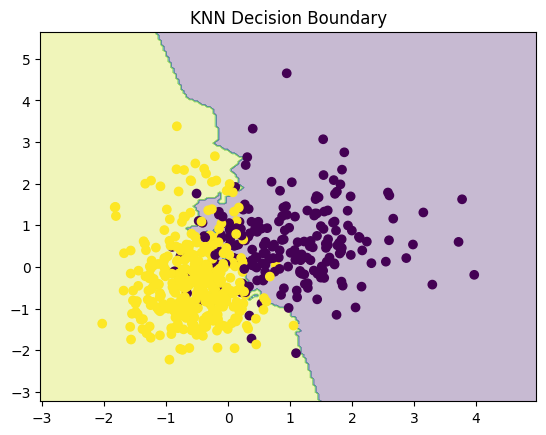

In [2]:
#EXPERIMENT 25
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load & preprocess
data = load_breast_cancer()
X, y = data.data[:, :2], data.target
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train for K values
acc = []
for k in range(1, 11):
    m = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    acc.append(accuracy_score(y_test, m.predict(X_test)))

# Accuracy vs K plot
plt.plot(range(1, 11), acc, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

# Best model & confusion matrix
best_k = np.argmax(acc) + 1
model = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
print("Confusion Matrix:\n", confusion_matrix(y_test, model.predict(X_test)))

# Decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("KNN Decision Boundary")
plt.show()
